In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
import cv2
from PIL import Image

In [2]:
def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else: 
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def save_image(data, filename, cmap='gray', vmin=None, vmax=None):
    plt.figure()
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()  

# Function to apply full-scale contrast
def full_scale_contrast(image):
    image_min = np.min(image)
    image_max = np.max(image)
    return (255 * (image - image_min) / (image_max - image_min)).astype(np.uint8)

In [3]:
input_image = np.fromfile('../../data/salesmanbin.sec', dtype=np.uint8).reshape(256, 256)

In [4]:
# Convert input image to float for FFT
input_image_float = input_image.astype(float)

# Initialize impulse response H (7x7 square of 1/49)
H = np.zeros((256, 256))
H[126:133, 126:133] = 1 / 49.0

# Create the zero-phase impulse response H2 using fftshift
H2 = np.zeros_like(H)
H2 = fftshift(H)

# Zero-padding the input image and impulse response to 512x512
input_image_padded = np.zeros((512, 512))
input_image_padded[:256, :256] = input_image_float

H2_padded = np.zeros((512, 512))
H2_padded[:256, :256] = H2

In [5]:
# Compute the 2D FFT of both the input image and the zero-phase impulse response
X_tilde = fft2(input_image_padded)
H2_tilde = fft2(H2_padded)

# Pointwise multiply the FFTs
Y_tilde = X_tilde * H2_tilde

# Compute the inverse FFT to get the filtered image
Y = np.real(ifft2(Y_tilde))

# Crop the center 256x256 region
output_image = Y[:256, :256]

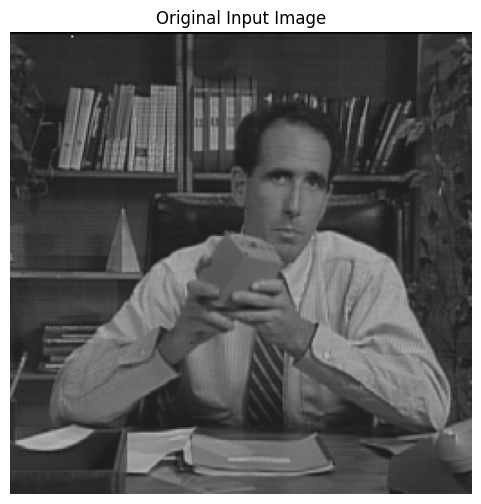

In [6]:
input_image_contrasted = full_scale_contrast(input_image_float)
show_image("Original Input Image", input_image_contrasted)
save_image(input_image_contrasted, "original.png")

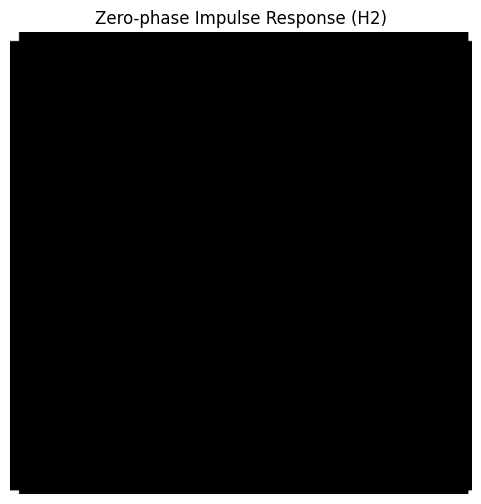

In [7]:
H2_contrasted = full_scale_contrast(H2)
show_image("Zero-phase Impulse Response (H2)", H2_contrasted)
save_image(H2_contrasted, "zero_phase_impulse_response.png")

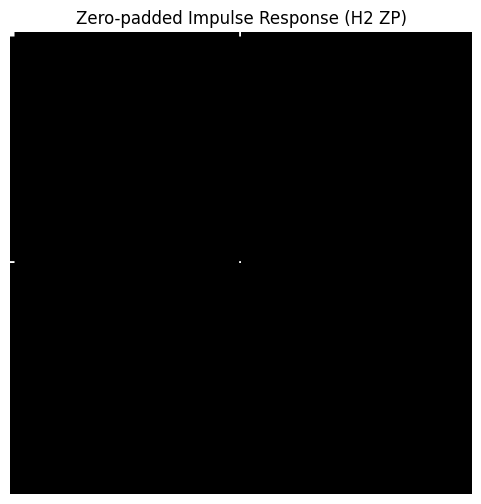

In [8]:
H2_padded_contrasted = full_scale_contrast(H2_padded)
show_image("Zero-padded Impulse Response (H2 ZP)", H2_padded_contrasted)
save_image(H2_padded_contrasted, "zero_padded_impulse_response.png")

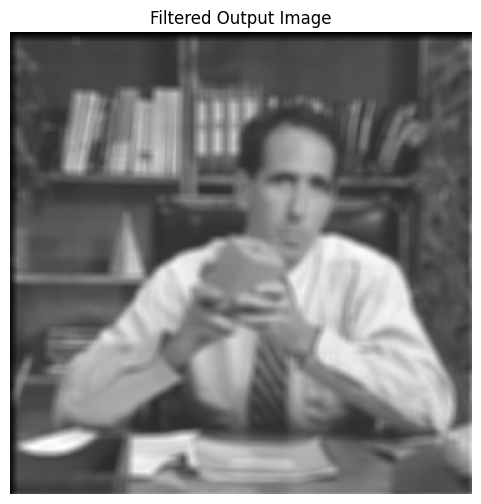

In [9]:
output_image_contrasted = full_scale_contrast(output_image)
show_image("Filtered Output Image", output_image_contrasted)
save_image(output_image_contrasted, "filtered_output_image.png")

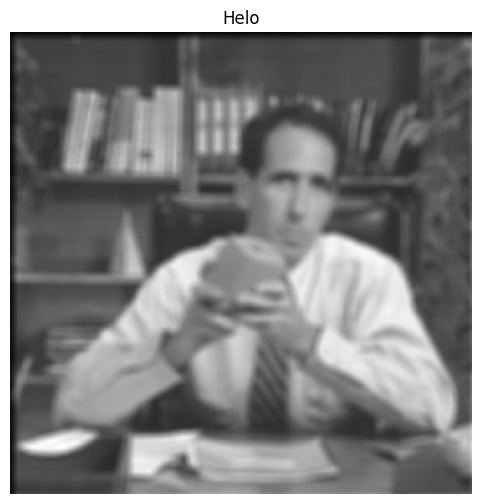

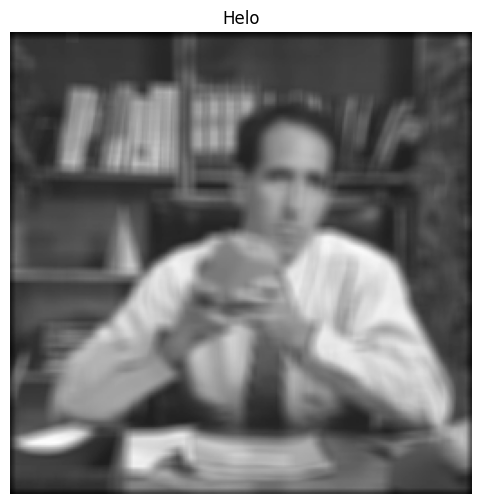

(b): max difference from part (a): 117.00


In [10]:

# Đọc hình ảnh và chuyển thành mảng NumPy
Y1a = np.array(Image.open("../problem_a/filtered_image_a.png"))
Y1b = np.array(Image.open("filtered_output_image.png"))

# Đổi kích thước Y1b về kích thước của Y1a
Y1b_resized = np.array(Image.fromarray(Y1b).resize(Y1a.shape[1::-1]))
show_image("Helo",Y1b_resized)
show_image("Helo",Y1a)

# Tính độ chênh lệch tối đa
max_difference = np.max(np.abs(Y1b_resized.astype(np.int32) - Y1a.astype(np.int32)))
print(f"(b): max difference from part (a): {max_difference:.2f}")
